<a href="https://colab.research.google.com/github/ktiwari9/algotradingbot/blob/master/Dual_Moving_Avg_Crossover_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This is Dual Moving Average Crossover Trading Bot that allows to backtrack the trading strategy
# It uses the Short-term vs long-term moving average comparison to determine when to buy or sell
# Inspired by: https://www.youtube.com/watch?v=SEQbb8w7VTw

In [ ]:
# All necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# introductory prints
print("This is a DMAG Trading Bot")
print("The Trading signal is identified when a short term average crosses a long-term average")
print("When Short-Term Avg. (STA) crosses the Long Term Avg. (LTA) by rising above it, a BUY signal is triggered")
print("When STA dips below the LTA, a SELL signal is triggered")

This is a DMAG Trading Bot
The Trading signal is identified when a short term average crosses a long-term average
When Short-Term Avg. (STA) crosses the Long Term Avg. (LTA) by rising above it, a BUY signal is triggered
When STA dips below the LTA, a SELL signal is triggered


In [ ]:
# Import Historic Stock charts - Upload a CSV if not already done
# from google.colab import files
# files.upload()

# dataset obtained from Yahoo Finance: https://finance.yahoo.com/quote/AAPL/history?period1=1159747200&period2=1596326400&interval=1d&filter=history&frequency=1d

In [ ]:
# Store the data as a panda dataframe
AAPL = pd.read_csv('AAPL.csv')
# Sort the data frame in ascending by dates column
# AAPL_sorted = AAPL.sort_values(by=['Date'])

# Show the data
AAPL 

# Truncate the data until 30th Dec 2011
AAPL = AAPL[0:1323] # 1323 rows mark until 30th Dec 2011
max_adj_close = AAPL['Adj Close'].max()
min_adj_close = AAPL['Adj Close'].min()

print(AAPL) # Truncated the data until 30th Dec 2011 for better visibility
print("Max Adj. Close Price = ", max_adj_close)
print("Min Adj. Close Price = ", min_adj_close)

# Caution: Dataset used in example was from 2nd Oct 2006 - 30th Dec 2011 which is a different range from this data.

            Date       Open       High  ...      Close  Adj Close     Volume
0     2006-10-02  10.728572  10.838572  ...  10.694285   9.258014  178159800
1     2006-10-03  10.635715  10.707143  ...  10.582857   9.161551  197677200
2     2006-10-04  10.585714  10.780000  ...  10.768572   9.322326  207270700
3     2006-10-05  10.647142  10.880000  ...  10.690000   9.254304  170970800
4     2006-10-06  10.631429  10.720000  ...  10.602858   9.178867  116739700
...          ...        ...        ...  ...        ...        ...        ...
1318  2011-12-23  57.098572  57.655716  ...  57.618572  49.880241   67349800
1319  2011-12-27  57.585712  58.441429  ...  58.075714  50.275993   66269000
1320  2011-12-28  58.127144  58.321430  ...  57.520000  49.794914   57165500
1321  2011-12-29  57.628571  57.950001  ...  57.874287  50.101627   53994500
1322  2011-12-30  57.644287  58.040001  ...  57.857143  50.086784   44915500

[1323 rows x 7 columns]
Max Adj. Close Price =  52.218872
Min Adj. Close Pr

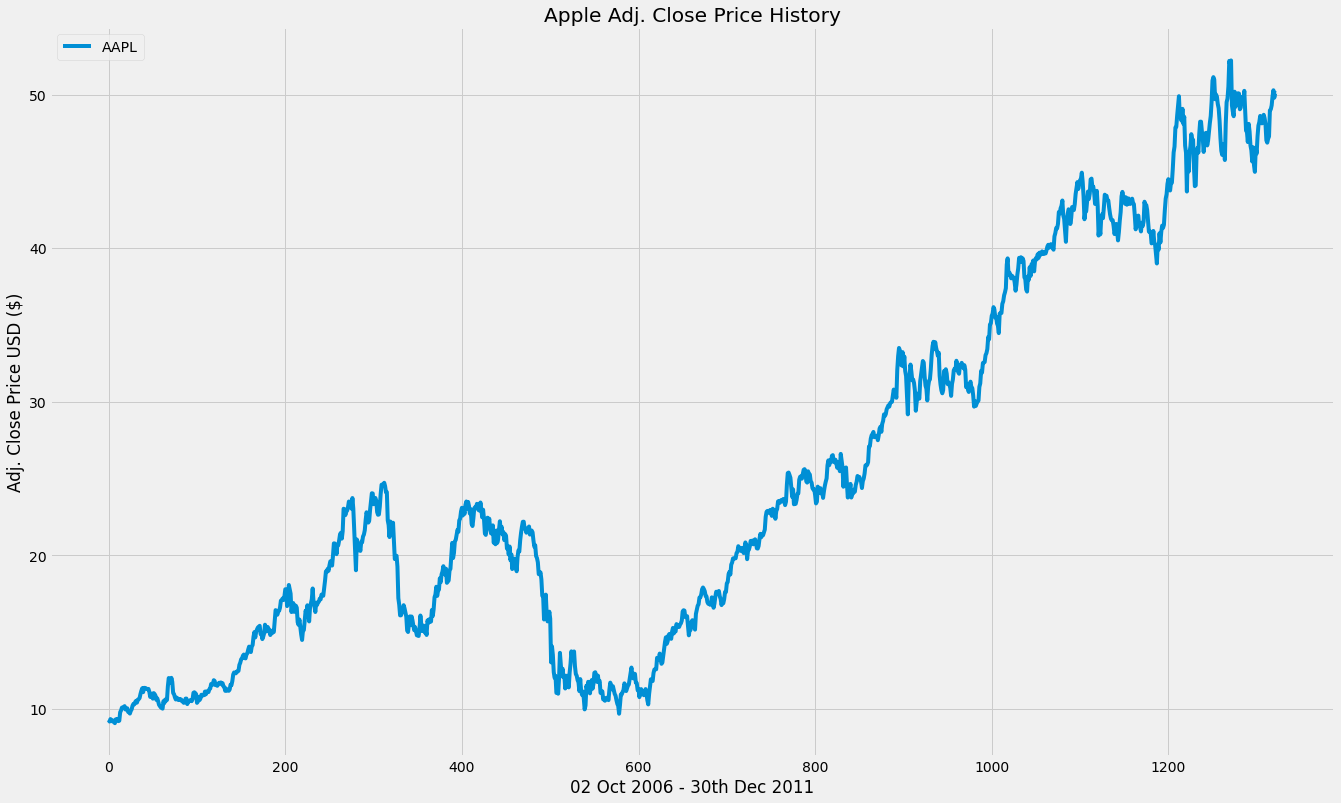

In [ ]:
# Plot the data

plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(AAPL['Adj Close'], label = 'AAPL') # adjusted price on the x axis
plt.title('Apple Adj. Close Price History')
plt.xlabel('02 Oct 2006 - 30th Dec 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Setup Moving Average Windows
Window_lower = 30 # short-term
Window_upper = 100 # long-term

# Short term moving average
SMA_short = pd.DataFrame() # simple moving average
SMA_short['Adj Close']= AAPL['Adj Close'].rolling(window = Window_lower).mean()

# Long term moving average
SMA_long = pd.DataFrame() # simple moving average
SMA_long['Adj Close']= AAPL['Adj Close'].rolling(window = Window_upper).mean()


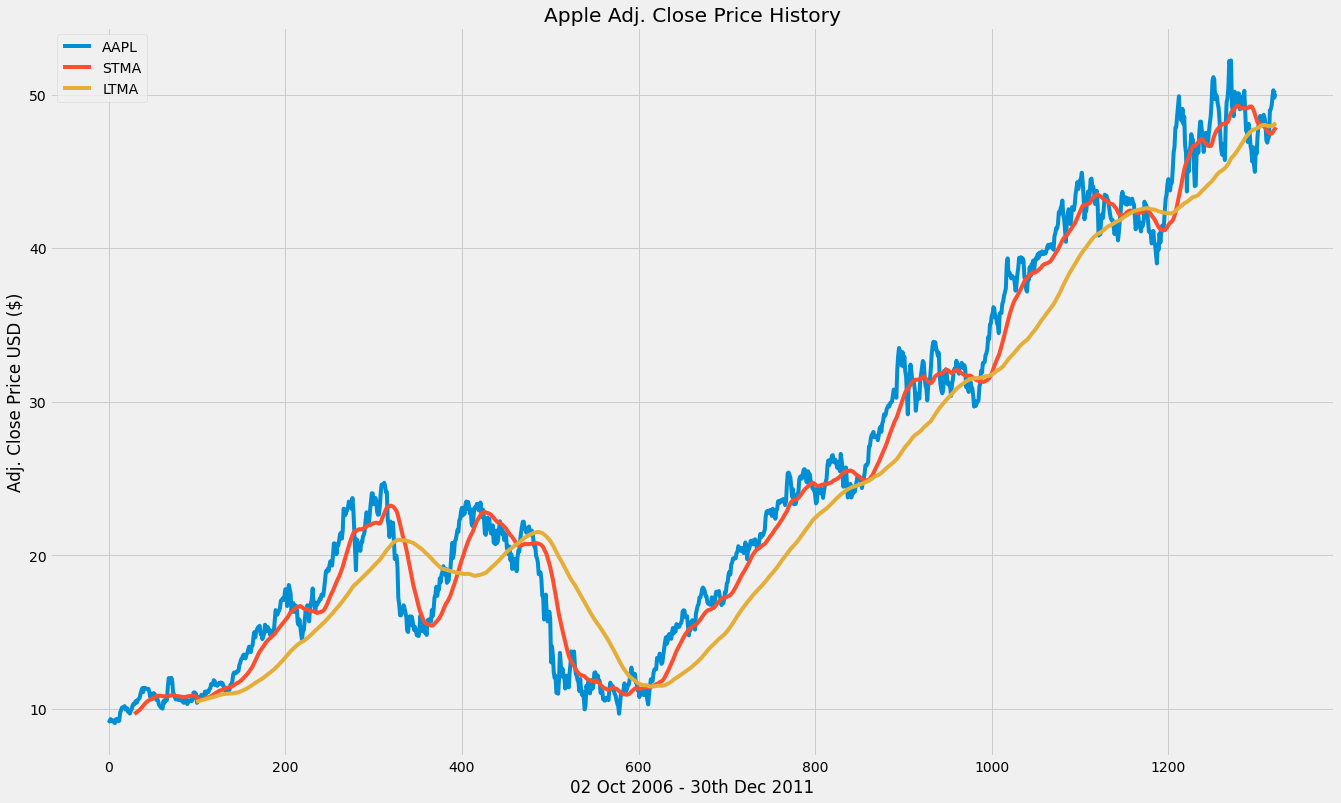

In [ ]:
# Plot the short and long term moving averages with the raw data
plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(AAPL['Adj Close'], label = 'AAPL') # adjusted price on the x axis
plt.plot(SMA_short['Adj Close'], label = 'STMA') # short term moving avg
plt.plot(SMA_long['Adj Close'], label = 'LTMA') # long term moving avg
plt.title('Apple Adj. Close Price History')
plt.xlabel('02 Oct 2006 - 30th Dec 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create dataset to store short and long term moving avg
moving_avg = pd.DataFrame()
moving_avg['AAPL']= AAPL['Adj Close']
moving_avg['STMA']= SMA_short['Adj Close']
moving_avg['LTMA']= SMA_long['Adj Close']

In [ ]:
# Create Buy vs Sell signals

def investment_signal(data):
  sigPriceToBuy = []
  sigPriceToSell = []
  isCross = -1 # flag to check when STMA crosses over LTMA

  for i in range(len(data)):
    if data['STMA'][i]> data['LTMA'][i]:
      if isCross !=1:
        sigPriceToBuy.append(data['AAPL'][i]) # good time to buy
        sigPriceToSell.append(np.nan)
        isCross = 1
      else:
        sigPriceToBuy.append(np.nan)
        sigPriceToSell.append(np.nan)
    elif data['STMA'][i]< data['LTMA'][i]:
        if isCross!= 0:
          sigPriceToBuy.append(np.nan) 
          sigPriceToSell.append(data['AAPL'][i]) # good time to sell
          isCross = 0
        else:
          sigPriceToBuy.append(np.nan)
          sigPriceToSell.append(np.nan)
    else:
        sigPriceToBuy.append(np.nan)
        sigPriceToSell.append(np.nan)

  return (sigPriceToBuy,sigPriceToSell)

In [ ]:
# Store the Buy and Sell data
buy_sell = investment_signal(moving_avg)
moving_avg['Buy_Signal_Price'] = buy_sell[0]
moving_avg['Sell_Signal_Price'] = buy_sell[1]
moving_avg

,AAPL,STMA,LTMA,Buy_Signal_Price,Sell_Signal_Price
0,9.258014,NaN,NaN,NaN,NaN
1,9.161551,NaN,NaN,NaN,NaN
2,9.322326,NaN,NaN,NaN,NaN
3,9.254304,NaN,NaN,NaN,NaN
4,9.178867,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1318,49.880241,47.529592,47.965659,NaN,NaN
1319,50.275993,47.619913,48.001722,NaN,NaN
1320,49.794914,47.716294,48.037611,NaN,NaN
1321,50.101627,47.783447,48.101809,NaN,NaN


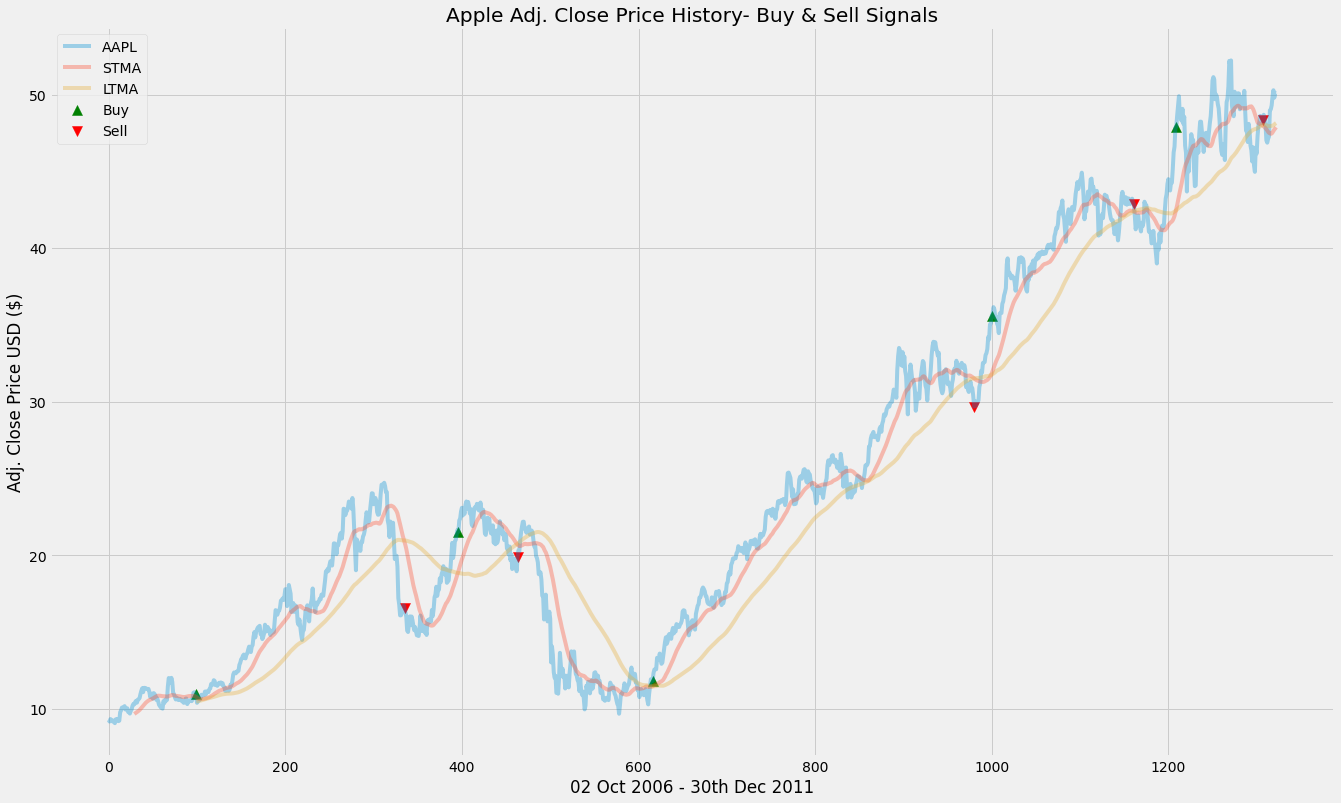

In [ ]:
# Plot the data with buy and signal markers
plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(AAPL['Adj Close'], label = 'AAPL',alpha= 0.35) # adjusted price on the x axis
plt.plot(SMA_short['Adj Close'], label = 'STMA',alpha= 0.35) # short term moving avg
plt.plot(SMA_long['Adj Close'], label = 'LTMA',alpha= 0.35) # long term moving avg

# Buy Signal
plt.scatter(moving_avg.index, moving_avg['Buy_Signal_Price'], label = 'Buy', marker = "^", color="green",s=100) # Decision Made to buy

# Sell Signal
plt.scatter(moving_avg.index,moving_avg['Sell_Signal_Price'], label = 'Sell',  marker = "v", color="red",s=100) # long term moving avg


plt.title('Apple Adj. Close Price History- Buy & Sell Signals')
plt.xlabel('02 Oct 2006 - 30th Dec 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Calculate Profit and Losses
def PnL(data):
  loss = 0
  profit = 0
  print(data)

  for i in range(len(data)):
    if (data[i]['Buy_Signal_Price'] - data[i]['Sell_Signal_Price'] >=0):
        print("1")
        # we made a loss
        loss = loss + data[i]['Buy_Signal_Price'] - data[i]['Sell_Signal_Price']
    else:
        print("2")
        # we made profit
        profit = profit + data[i]['Buy_Signal_Price'] - data[i]['Sell_Signal_Price']

  return (profit, loss)

In [ ]:
# TODO: Call the P&L Function and compute the performance

print("Lossy moves = 1 around marker 400")

Lossy moves = 1 around marker 400
